<a href="https://colab.research.google.com/github/sharsh09/project-reports/blob/main/majorproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#UNSUPERVISED LEARNING -CLUSTERING -  K MEANS CLUSTERING
#IN CLUSTERING - THERE IS NO y(OUTPUT),we only consider i/p to train our model.

In [ ]:
#1.take data and create dataframe
import pandas as pd
data = pd.read_csv('/content/segmentation data.csv')
df = pd.DataFrame(data, columns=['ID', 'Sex',	'Age', 'Income', 'Settlement size'])
df

,ID,Sex,Age,Income,Settlement size
0,100000001,0,67,124670,2
1,100000002,1,22,150773,2
2,100000003,0,49,89210,0
3,100000004,0,45,171565,1
4,100000005,0,53,149031,1
...,...,...,...,...,...
1995,100001996,1,47,123525,0
1996,100001997,1,27,117744,0
1997,100001998,0,31,86400,0
1998,100001999,1,24,97968,0


In [ ]:
df.shape

(2000, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Income           2000 non-null   int64
 4   Settlement size  2000 non-null   int64
dtypes: int64(5)
memory usage: 78.2 KB


In [ ]:
#Input - Age and Annual Income
#4.divide the into i/p
x = df.iloc[:,2:4].values
x

array([[    67, 124670],
       [    22, 150773],
       [    49,  89210],
       ...,
       [    31,  86400],
       [    24,  97968],
       [    25,  68416]])

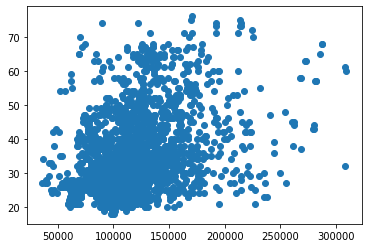

In [ ]:
#VISUALISATION
import matplotlib.pyplot as plt
plt.scatter(df['Income'],df['Age'])
#Here we have got only one cluster before applying any clustering technique

In [ ]:
#Here our main task is to find out the number of clusters(k)
import numpy as np
np.sqrt(2000) # 2000 is the total no of points
#k value should not exceed the square root of the total no of points
#Hence k value should be in the range of 2 to 45

44.721359549995796

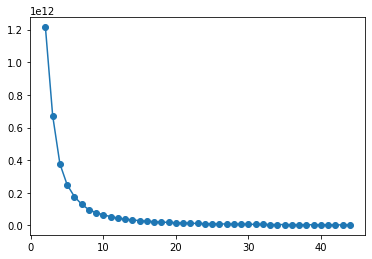

In [ ]:
#1.ELBOW METHOD
from sklearn.cluster import KMeans
k = range(2,45)# my range is in between 2 and 45

sse = [] #blank list

#for i in range(2,45):
for i in k :
  model_demo = KMeans(n_clusters = i,random_state = 0)
  model_demo.fit(x)
  sse.append(model_demo.inertia_)#.inertia_ - calculates the sum of squared error
plt.scatter(k,sse)
plt.plot(k,sse)

In [ ]:
#We will now consider the point at which the eblow is more prominent(projecting from something)
# We will consider k as 7 for now , but we are not sure

2 Clusters ,Score = 0.5834469068936822
3 Clusters ,Score = 0.5116316441491894
4 Clusters ,Score = 0.54299218077665
5 Clusters ,Score = 0.5401520680025738
6 Clusters ,Score = 0.5425446774454399
7 Clusters ,Score = 0.5352530115610864
8 Clusters ,Score = 0.5407443028572397
9 Clusters ,Score = 0.5331090406504704
10 Clusters ,Score = 0.5316509306525833
11 Clusters ,Score = 0.5346461939922239
12 Clusters ,Score = 0.546748013211452
13 Clusters ,Score = 0.5447936152017392
14 Clusters ,Score = 0.5383651685808202
15 Clusters ,Score = 0.5427850042355558
16 Clusters ,Score = 0.5361798352934857
17 Clusters ,Score = 0.5382544228749134
18 Clusters ,Score = 0.5388886232322623
19 Clusters ,Score = 0.5377919516079881
20 Clusters ,Score = 0.5377240901750185
21 Clusters ,Score = 0.5442144342062256
22 Clusters ,Score = 0.5417168708667498
23 Clusters ,Score = 0.5443968718435994
24 Clusters ,Score = 0.5446904834769162
25 Clusters ,Score = 0.5387989753137833
26 Clusters ,Score = 0.533493932872274
27 Clusters 

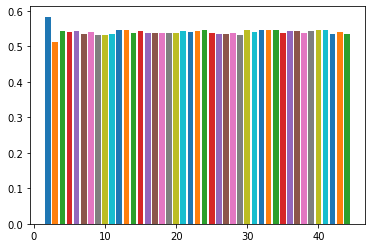

In [ ]:
#2.SILHOUETTE SCORE METHOD
from sklearn.metrics import silhouette_score
k = range(2,45)
for i in k:
  model_demo = KMeans(n_clusters = i,random_state = 0)
  model_demo.fit(x)
  y_pred = model_demo.predict(x)
  print(f"{i} Clusters ,Score = {silhouette_score(x,y_pred)}")
  plt.bar(i,silhouette_score(x,y_pred))


In [ ]:
#CONFIRMATION : THE No of CLUSTERS TO BE CONSIDERED IS 2 not 7.

In [ ]:
#7.APPLY CLUSTERER
k = 2
from sklearn.cluster import KMeans

model = KMeans(n_clusters = k,random_state = 0)
model.fit(x)

KMeans(n_clusters=2, random_state=0)

In [ ]:
y = model.predict(x) # predicted output
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
y.size

2000

In [ ]:
x[y == 1,1]
#so the first '1' is cluster no 1 and the second '1' is column index 1 
#the value of input,when cluster 1 is selected and column index 1 selected

array([150773, 171565, 149031, 144848, 156495, 193621, 151591, 174646,
       157434, 261952, 144657, 147511, 163025, 175882, 159646, 162745,
       155569, 143385, 163329, 155104, 142335, 138387, 140182, 180196,
       202575, 183657, 152267, 166410, 227385, 148115, 139780, 169102,
       141858, 140888, 157299, 155486, 151697, 159246, 241068, 149022,
       165230, 268340, 195465, 244716, 183108, 152876, 165147, 140520,
       162445, 189896, 153539, 180495, 166933, 143979, 176714, 149249,
       194728, 204723, 176057, 144332, 140665, 152383, 153286, 214204,
       208101, 146529, 224998, 141116, 147687, 153031, 211229, 177291,
       168763, 176645, 214364, 217651, 147626, 175223, 137467, 222294,
       157940, 150699, 178967, 236264, 207783, 139157, 167076, 141270,
       169617, 149237, 215150, 244541, 175367, 144884, 151180, 152308,
       167945, 210017, 214620, 193816, 168714, 202997, 192451, 161379,
       146117, 219319, 144701, 146349, 141825, 165190, 145059, 148363,
      

In [ ]:
np.unique(y,return_counts = True)

(array([0, 1], dtype=int32), array([1489,  511]))

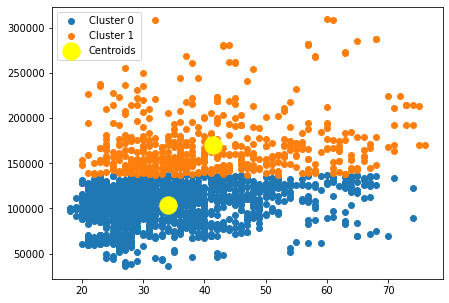

In [ ]:
#FINAL VISUALISATION
plt.figure(figsize = (7,5))
for i in range(k):
  plt.scatter(x[y == i,0],x[y == i,1],label = f'Cluster {i}')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 300,c = 'yellow',
            label = 'Centroids')
plt.legend()